### ***Estrutura do código:***

**Introdução**
Descrever os problemas e objetivos


**Configurando o ambiente**

1. **Qual é a distribuição da idade dos pacientes no conjunto de dados?**
2. **Existe alguma correlação entre o colesterol em repouso e a frequência cardíaca máxima atingida?**
3. **Qual é a proporção de homens e mulheres no conjunto de dados?**
4. **Há alguma relação entre o tipo de dor no peito e a presença de angina de exercício?**
5. **Qual é a distribuição dos tipos de dor no peito entre os pacientes?**


# **Instalação e Importação das bibliotecas**

In [1]:
import pandas as pd
import plotly.io as pio
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns







# Entender a estrutura da base de dados

In [6]:
#Importando e revisando a base de dados 
base=pd.read_csv('C:\dados\doencas_cardiacas\doencas-card.csv')
#base.info()
base.isnull().sum()
base.duplicated().sum()
df=base.drop_duplicates()

df.head()




,idade,sexo,tipo de dor no peito,pressao arterial em repouso,colesterol,glicemia em jejum,ecg em repouso,freq_card_max,angina de exercicio,pico antigo,inclinacao ST,alvo
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


### Algumas correções na base de dados

In [23]:
#Alteração sexo
sex_bins = [0,1,2]
sex_labels = ['F','M']
df['SEXO'] = pd.cut(df['sexo'],bins=sex_bins, labels=sex_labels, right=False)

#Alteração faixa_etaria
bins = [0, 30, 40, 50, 60, 70, 80]
labels = ['0-30', '31-40', '41-50', '51-60', '61-70', '71-80']
df['faixa_etaria'] = pd.cut(df['idade'], bins=bins, labels=labels, right=False)

# #Alteração Tipos de dores no peito
dor_bins = [1,2,3,4,5]
dor_labels = ['angina tipica','angina atipica','dor não anginosa','assintomatico']
df['Tipos de dores no peito'] = pd.cut(df['tipo de dor no peito'], bins=dor_bins, labels=dor_labels, right=False)

#Alteração Angina de exercicio
# 1 = sim; 0 = não
ang_bins = [0,1,2]
ang_labels = ['S','N']
df['Angina por exercicio'] = pd.cut(df['angina de exercicio'],bins=ang_bins, labels=ang_labels, right=False)

#Glicemia em jejum glicemia em jejum > 120 mg/dl) 
# (1 = verdadeiro; 0 = falso)

gli_bins = [0,1,2]
gli_labels = ['Falso','Verdadeiro']
df['Glicemia em jejum >120mg/dl'] = pd.cut(df['glicemia em jejum'], bins=gli_bins, labels=gli_labels, right=False)

#alteração alvo
# 1 = doença cardíaca, 0 = Normal
alvo_bins = [0,1,2]
alvo_labels = ['Saudavel','Doença Cardiaca']
df['ALVO'] = pd.cut(df['alvo'], bins=alvo_bins, labels=alvo_labels, right=False)


#reordenando as colunas com as informações corretas
dados=df[['idade','faixa_etaria','SEXO','Tipos de dores no peito', 'pressao arterial em repouso','colesterol','Glicemia em jejum >120mg/dl','ecg em repouso','freq_card_max','Angina por exercicio','ALVO']]

# Percebi que alguns valores de colesterol estavam zerados, atrapalhando nossa analise. Com isso, removemos as linhas com valor 0
dados=dados.sort_values(by='colesterol')
dados = dados.query('colesterol > 0')
dados = dados.query('colesterol <=300')
display(dados)



C:\Users\João Paulo\AppData\Local\Temp\ipykernel_18068\187792139.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SEXO'] = pd.cut(df['sexo'],bins=sex_bins, labels=sex_labels, right=False)
C:\Users\João Paulo\AppData\Local\Temp\ipykernel_18068\187792139.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['faixa_etaria'] = pd.cut(df['idade'], bins=bins, labels=labels, right=False)
C:\Users\João Paulo\AppData\Local\Temp\ipykernel_18068\187792139.py:14: SettingWithCopyWarning: 
A value is trying to be

,idade,faixa_etaria,SEXO,Tipos de dores no peito,pressao arterial em repouso,colesterol,Glicemia em jejum >120mg/dl,ecg em repouso,freq_card_max,Angina por exercicio,ALVO
98,56,51-60,M,assintomatico,120,85,Falso,0,140,S,Saudavel
445,56,51-60,M,assintomatico,120,100,Falso,0,120,N,Doença Cardiaca
78,52,51-60,M,angina atipica,140,100,Falso,0,138,N,Saudavel
572,69,61-70,M,assintomatico,140,110,Verdadeiro,0,109,N,Doença Cardiaca
542,76,71-80,M,dor não anginosa,104,113,Falso,2,120,S,Doença Cardiaca
...,...,...,...,...,...,...,...,...,...,...,...
545,61,61-70,F,angina atipica,140,298,Verdadeiro,0,120,N,Saudavel
789,67,61-70,M,assintomatico,100,299,Falso,2,125,N,Doença Cardiaca
820,51,51-60,M,assintomatico,140,299,Falso,0,173,N,Doença Cardiaca
818,58,51-60,M,assintomatico,125,300,Falso,2,171,S,Doença Cardiaca


#### **1. Qual é a distribuição da idade dos pacientes no conjunto de dados?**


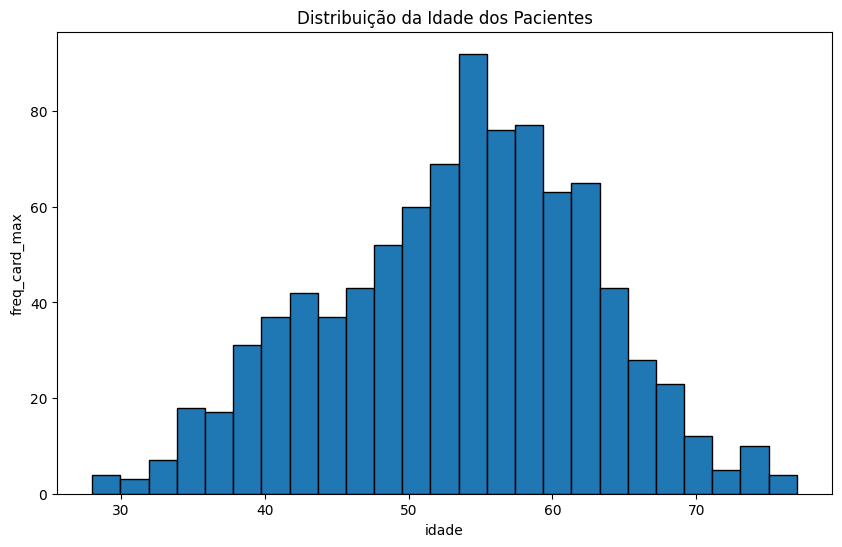

count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: idade, dtype: float64


In [9]:
# Plotar um histograma da distribuição da idade
plt.figure(figsize=(10, 6))
plt.hist(df['idade'], bins=25, edgecolor='black')
plt.title('Distribuição da Idade dos Pacientes')
plt.xlabel('idade')
plt.ylabel('freq_card_max')
plt.show()


idade_descr = df['idade'].describe()
print(idade_descr)


### 2. **Existe alguma correlação entre o colesterol e a frequência cardíaca máxima atingida?**


,colesterol,freq_card_max
colesterol,1.000000,0.003407
freq_card_max,0.003407,1.000000


C:\Users\João Paulo\AppData\Local\Temp\ipykernel_18068\995987023.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dados.corr(), annot=True, cmap='Blues')
C:\Users\João Paulo\AppData\Local\Temp\ipykernel_18068\995987023.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dados.corr()


,idade,pressao arterial em repouso,colesterol,ecg em repouso,freq_card_max
idade,1.000000,0.264273,0.038800,0.229553,-0.406618
pressao arterial em repouso,0.264273,1.000000,0.073621,0.063853,-0.110786
colesterol,0.038800,0.073621,1.000000,0.107079,0.003407
ecg em repouso,0.229553,0.063853,0.107079,1.000000,0.000985
freq_card_max,-0.406618,-0.110786,0.003407,0.000985,1.000000


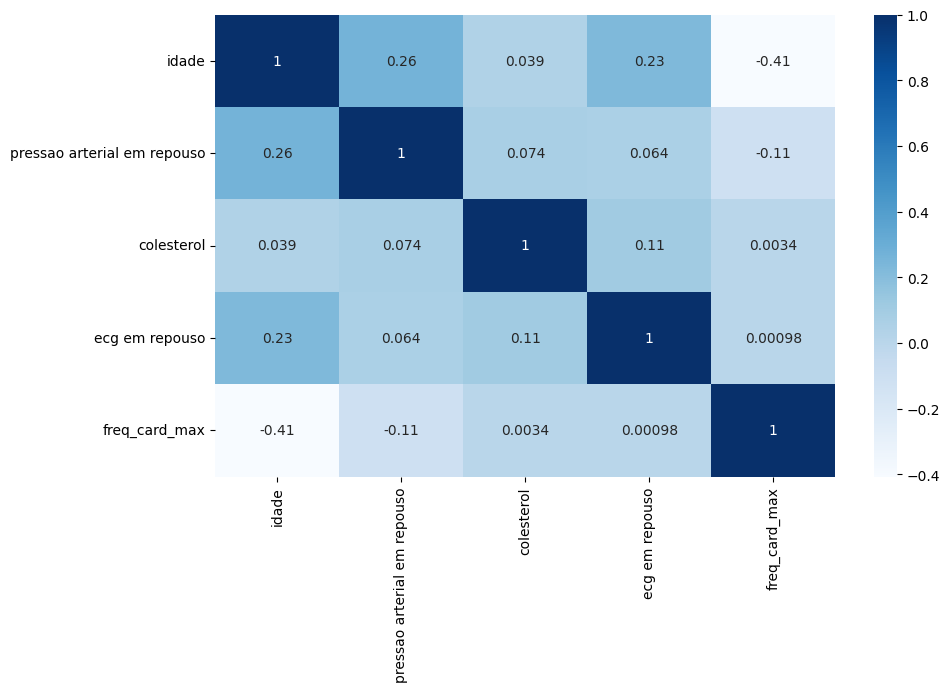

In [10]:

correlacao = dados[['colesterol', 'freq_card_max']].corr()
display(correlacao)


plt.figure(figsize=(10,6))
sns.heatmap(dados.corr(), annot=True, cmap='Blues')

dados.corr()

### **2.1 Distribuição da Frequência Cardíaca Máxima por Faixa Etária e Sexo**

,faixa_etaria,freq_card_max
98,51-60,140
445,51-60,120
78,51-60,138
572,61-70,109
542,71-80,120


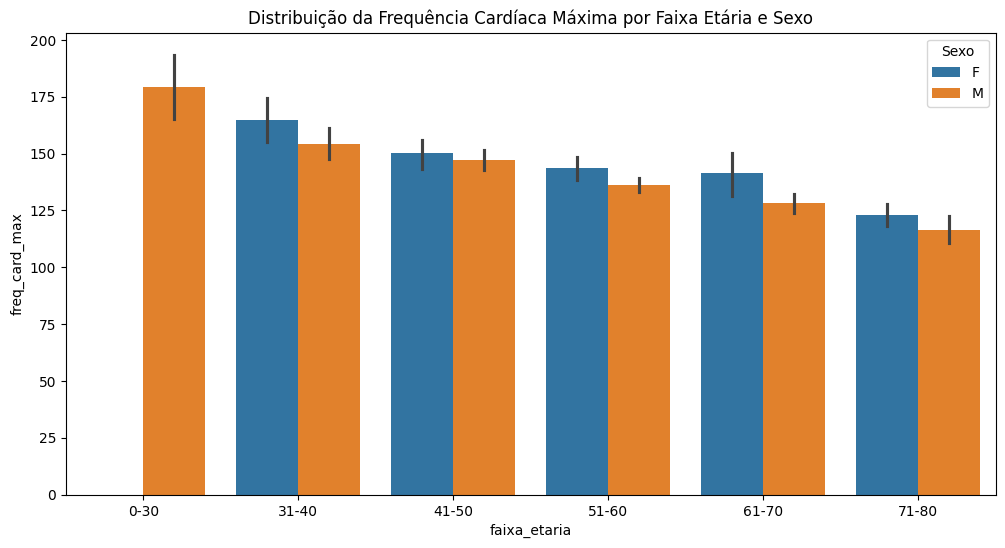

C:\Users\João Paulo\AppData\Local\Temp\ipykernel_18068\2342611799.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tipos de dores no peito'] = pd.cut(df['tipo de dor no peito'], bins=bins, labels=labels, right=False)


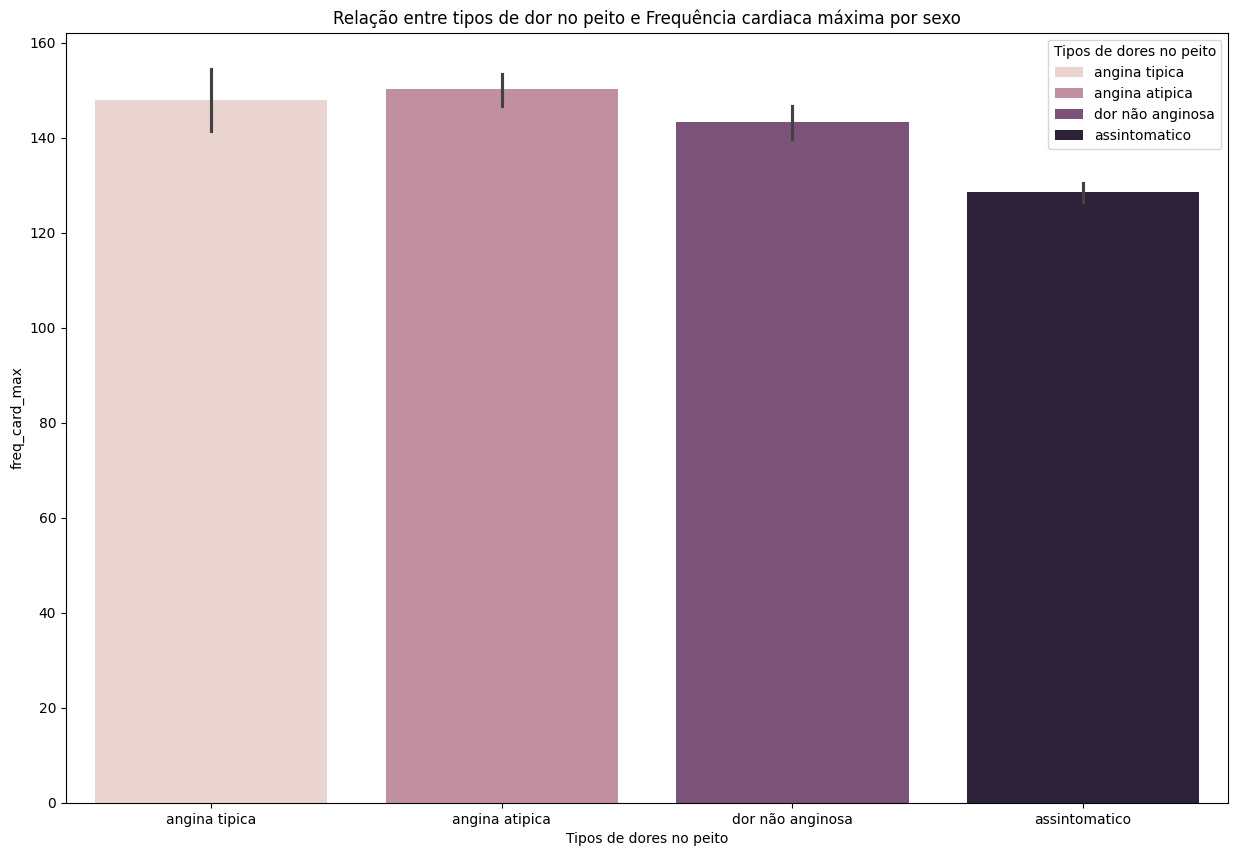

In [37]:
#Faixa etaria por frequencia cardiaca

#Criando a coluna para armazenar a faixa etária dos pacientes


# Verificar a distribuição das faixas etárias
display(dados[['faixa_etaria', 'freq_card_max']].head())

plt.figure(figsize=(12, 6))
sns.barplot(x='faixa_etaria', y='freq_card_max',hue='SEXO', data=dados)
plt.title('Distribuição da Frequência Cardíaca Máxima por Faixa Etária e Sexo')
plt.xlabel('faixa_etaria')
plt.ylabel('freq_card_max')
plt.legend(title='Sexo')

# # Obtendo a legenda atual
# legenda = plt.legend(title='Sexo')
# sex_labels = {'1': 'M', '0': 'F'}
# # Alterando os rótulos da legenda
# for label in legenda.get_texts():
#     label.set_text(sex_labels[label.get_text()])

plt.show()


#('Relação entre tipos de dor no peito e Frequência cardiaca máxima por sexo')
bins = [1,2,3,4,5]
labels = ['angina tipica','angina atipica','dor não anginosa','assintomatico']
df['Tipos de dores no peito'] = pd.cut(df['tipo de dor no peito'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(15, 10))
sns.barplot(x='Tipos de dores no peito', y='freq_card_max',hue='tipo de dor no peito', data=df)
plt.title('Relação entre tipos de dor no peito e Frequência cardiaca máxima por sexo')
plt.xlabel('Tipos de dores no peito')
plt.ylabel('freq_card_max')
plt.legend(title='tipo de dor no peito')
# Obtendo a legenda atual
legenda = plt.legend(title='Tipos de dores no peito')
dores = {'1': 'angina tipica', '2': 'angina atipica', '3': 'dor não anginosa','4':'assintomatico'}
# Alterando os rótulos da legenda
for label in legenda.get_texts():
    label.set_text(dores[label.get_text()])


plt.show()

### 2.2 Distribuição de doenças cardiacas entre Homens e Mulheres

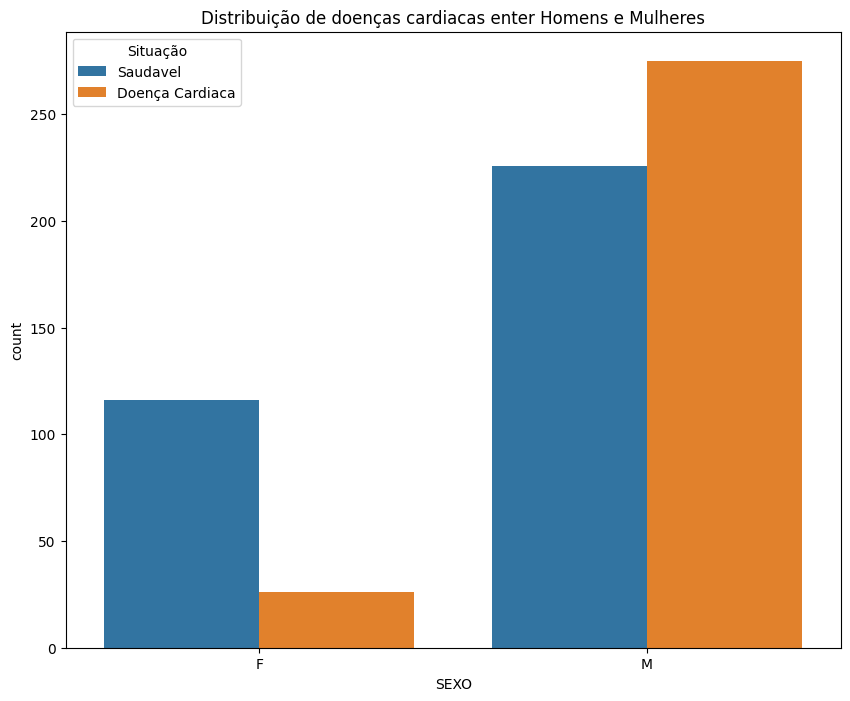

In [7]:
#display(dados)

plt.figure(figsize=(10, 8))
sns.countplot(x='SEXO',data=dados, hue='ALVO')
plt.title('Distribuição de doenças cardiacas enter Homens e Mulheres')
plt.xlabel('SEXO')
plt.legend(title='Situação')

plt.show()


### 3. **Qual é a proporção de homens e mulheres no conjunto de dados?**

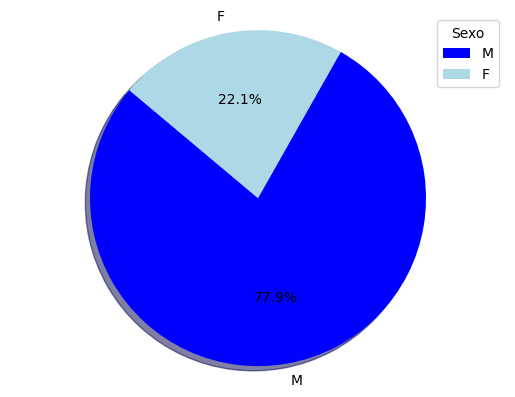

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

In [8]:
M=dados['SEXO'].value_counts().get(1, 0)
F=dados['SEXO'].value_counts().get(0, 0)

sexo_contagem = dados['SEXO'].value_counts()
labels = sexo_contagem.index
sizes = sexo_contagem.values

colors = ['blue', 'lightblue'] if len(labels) == 2 else ['gold', 'lightblue', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal') 
legenda = plt.legend(title='Sexo')

plt.show()

plt.figure(figsize=(15, 10))




###  4. **Há alguma relação entre o tipo de dor no peito e a presença de angina de exercício?**

Angina por exercicio,S,N
Tipos de dores no peito,,
angina tipica,34,6
angina atipica,132,15
dor não anginosa,120,30
assintomatico,118,188


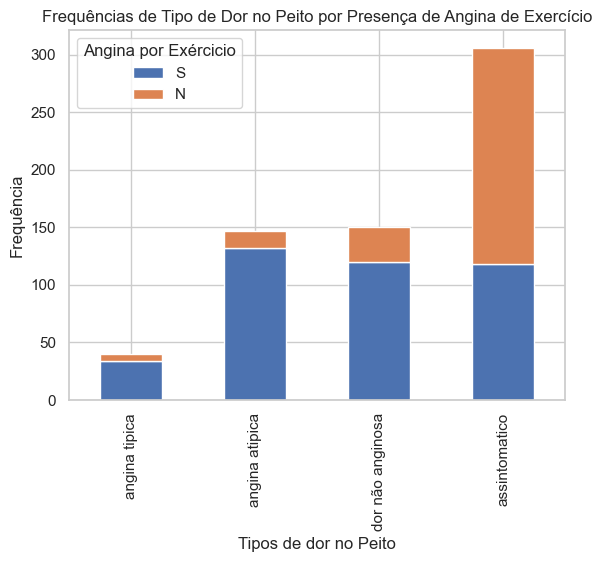

In [9]:
# dados.info()

frequencias = pd.crosstab(dados['Tipos de dores no peito'], dados['Angina por exercicio'])

display(frequencias)
sns.set(style="whitegrid")
frequencias.plot(kind='bar', stacked=True)

# Adicionar títulos e rótulos
plt.title('Frequências de Tipo de Dor no Peito por Presença de Angina de Exercício')
plt.xlabel('Tipos de dor no Peito')
plt.ylabel('Frequência')
plt.legend(title='Angina por Exércicio')
plt.xticks

plt.show()

# A Proporção de angina por exercicio é mais comum em pacientes com sintomas de angina atipica



### 5. **Qual é a distribuição dos tipos de dor no peito entre os pacientes?**

ALVO,Saudavel,Doença Cardiaca
Tipos de dores no peito,,
angina tipica,25,15
angina atipica,128,19
dor não anginosa,110,40
assintomatico,79,227


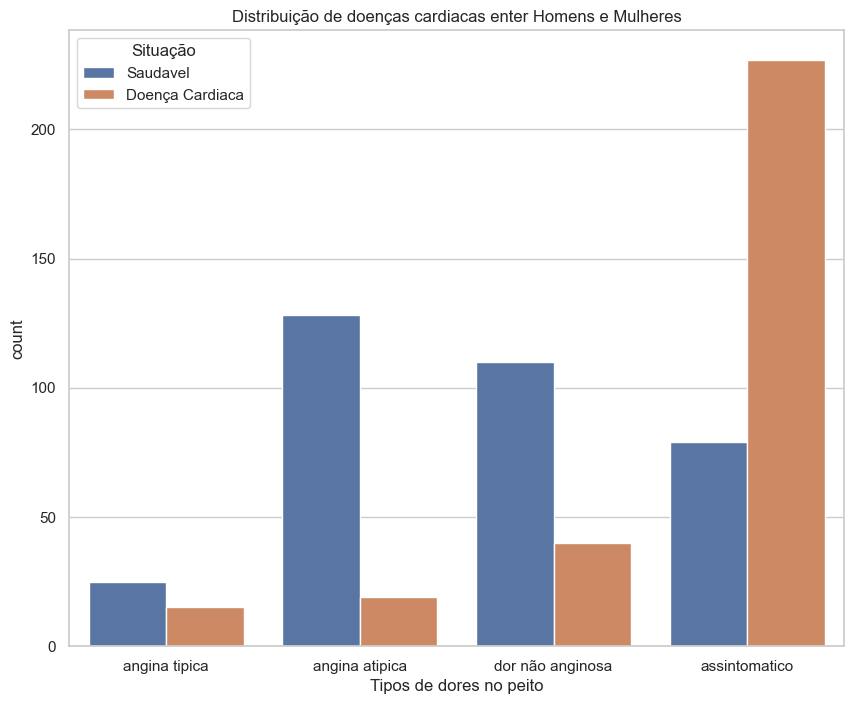

In [10]:
#display(dados)
freq= pd.crosstab(dados['Tipos de dores no peito'], dados['ALVO'])
display(freq)


plt.figure(figsize=(10, 8))
sns.countplot(x='Tipos de dores no peito',data=dados, hue='ALVO')
plt.title('Distribuição de doenças cardiacas enter Homens e Mulheres')
plt.legend(title='Situação')



# plt.figure(figsize=(8, 6))
# sns.barplot(x='faixa_etaria', y='Tipos de dores no peito',data=dados)
# plt.xlabel('faixa_etaria')
# plt.ylabel('Tipos de dores no peito')

# plt.title('Relação entre tipos de dor no peito e Frequência cardiaca máxima por sexo')
# plt.show()


# plt.figure(figsize=(8, 6))
# sns.barplot(x='ALVO', y='Tipos de dores no peito', hue='ALVO',data=dados)
# plt.title('Relação entre tipos de dor no peito e Frequência cardiaca máxima por sexo')
# plt.show()
